In [1]:
import os 
import urllib2
# import urllib
import io
import gzip

def download_file(remote, local):
    url = remote

    u = urllib2.urlopen(url)
    f = open(local, 'wb')
    meta = u.info()
    
    file_size = int(meta.getheaders("Content-Length")[0])
    print "Downloading: %s Bytes: %s" % (local, file_size)

    file_size_dl = 0
    block_sz = 8192
    while True:
        buffer = u.read(block_sz)
        if not buffer:
            break

        file_size_dl += len(buffer)
        f.write(buffer)
        status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
        status = status + chr(8)*(len(status)+1)
#         print status,

    f.close()


data_dir = "../data"
data_file_url = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
if os.path.exists(data_dir) == False:
    os.makedirs(data_dir)
    print("Directory created: " + data_dir)

    
data_filename = "mnist.pkl.gz"
data_filepath = data_dir + "/" + data_filename 

download_file(remote = data_file_url, local = data_filepath)


# with urllib2.urlopen(data_file_url) as d:
#     data = d.read()
#     d.close()

# with open(data_filepath, 'wb') as f:
#     f.write(data)

print("# Completed downloading file: " + data_filename)

Downloading: ../data/mnist.pkl.gz Bytes: 17051982
# Completed downloading file: mnist.pkl.gz


In [3]:
import mnist_loader
import numpy as np 
import pandas as pd 

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print("Training data, validation data and test data loaded.")

Training data, validation data and test data loaded.


In [31]:
print("3. ")

image_train_list = []
class_train_list = []

for i in training_data:
    image_train_list.append(i[0])
    class_train_list.append(i[1])

no_of_image_train, image_size_train, m = np.array(image_train_list).shape

print("# Size of each image: " + str(image_size_train))

    
max_image_data = np.max(image_train_list)
min_image_data = np.min(image_train_list)

print("# Range of data: max = " + str(max_image_data) + ", min: " + str(min_image_data))

no_of_image_class, no_of_classes, class_dimension = np.array(class_train_list).shape

print("# Number of classes: "+ str(no_of_classes))

3. 
# Size of each image: 784
# Range of data: max = 0.99609375, min: 0.0
# Number of classes: 10


In [32]:
image_test_list = []
class_test_list = []

image_validation_list = []
class_validation_list = []

for i in test_data:
    image_test_list.append(i[0])
    class_test_list.append(i[1])
    
for i in validation_data:
    image_validation_list.append(i[0])
    class_validation_list.append(i[1])

no_of_image_test, image_size_test, m_test = np.array(image_test_list).shape
no_of_image_validation, image_size_validation, m_validation = np.array(image_validation_list).shape


print("# No of images in train: " + str(no_of_image_train))
print("# No of images in test: " + str(no_of_image_test))
print("# No of images in validation: " + str(no_of_image_validation))

# No of images in train: 50000
# No of images in test: 10000
# No of images in validation: 10000


In [34]:
import network

net = network.Network([784, 30, 10])


In [37]:
net.SGD(epochs=30, mini_batch_size=10, training_data=training_data, test_data=test_data, eta=3.0)

Epoch 0: 9121 / 10000
Epoch 1: 9225 / 10000
Epoch 2: 9312 / 10000
Epoch 3: 9369 / 10000
Epoch 4: 9351 / 10000
Epoch 5: 9380 / 10000
Epoch 6: 9420 / 10000
Epoch 7: 9425 / 10000
Epoch 8: 9423 / 10000
Epoch 9: 9471 / 10000
Epoch 10: 9445 / 10000
Epoch 11: 9446 / 10000
Epoch 12: 9454 / 10000
Epoch 13: 9492 / 10000
Epoch 14: 9472 / 10000
Epoch 15: 9484 / 10000
Epoch 16: 9472 / 10000
Epoch 17: 9444 / 10000
Epoch 18: 9474 / 10000
Epoch 19: 9482 / 10000
Epoch 20: 9475 / 10000
Epoch 21: 9477 / 10000
Epoch 22: 9457 / 10000
Epoch 23: 9473 / 10000
Epoch 24: 9488 / 10000
Epoch 25: 9482 / 10000
Epoch 26: 9490 / 10000
Epoch 27: 9472 / 10000
Epoch 28: 9476 / 10000
Epoch 29: 9478 / 10000


In [39]:
print("6. Repeat training step 4,5 but for 100 hidden neurons")
no_hidden_neuron = 100
net_100 = network.Network([784, no_hidden_neuron, 10])
net_100.SGD(epochs=30, mini_batch_size=10, training_data=training_data, test_data=test_data, eta=3.0)


6. Repeat training step 4,5 but for 100 hidden neurons
Epoch 0: 5490 / 10000
Epoch 1: 5638 / 10000
Epoch 2: 5712 / 10000
Epoch 3: 5658 / 10000
Epoch 4: 5687 / 10000
Epoch 5: 5731 / 10000
Epoch 6: 5760 / 10000
Epoch 7: 5731 / 10000
Epoch 8: 5825 / 10000
Epoch 9: 5893 / 10000
Epoch 10: 6028 / 10000
Epoch 11: 7498 / 10000
Epoch 12: 7507 / 10000
Epoch 13: 7503 / 10000
Epoch 14: 7560 / 10000
Epoch 15: 7534 / 10000
Epoch 16: 7554 / 10000
Epoch 17: 7580 / 10000
Epoch 18: 7594 / 10000
Epoch 19: 7590 / 10000
Epoch 20: 7583 / 10000
Epoch 21: 7572 / 10000
Epoch 22: 7593 / 10000
Epoch 23: 7601 / 10000
Epoch 24: 7606 / 10000
Epoch 25: 7601 / 10000
Epoch 26: 7585 / 10000
Epoch 27: 7588 / 10000
Epoch 28: 7608 / 10000
Epoch 29: 7599 / 10000


In [41]:
print("7. Repeat training step 4,5 but for a learning rate of 0.001 and another time for 100.0")
no_hidden_neuron = 30
net_eta_001 = network.Network([784, no_hidden_neuron, 10])
net_eta_001.SGD(epochs=30, mini_batch_size=10, training_data=training_data, test_data=test_data, eta=0.001)

7. Repeat training step 4,5 but for a learning rate of 0.001 and another time for 100.0
Epoch 0: 962 / 10000
Epoch 1: 1012 / 10000
Epoch 2: 984 / 10000
Epoch 3: 982 / 10000
Epoch 4: 982 / 10000
Epoch 5: 982 / 10000
Epoch 6: 982 / 10000
Epoch 7: 983 / 10000
Epoch 8: 994 / 10000
Epoch 9: 1120 / 10000
Epoch 10: 1263 / 10000
Epoch 11: 1322 / 10000
Epoch 12: 1344 / 10000
Epoch 13: 1357 / 10000
Epoch 14: 1396 / 10000
Epoch 15: 1434 / 10000
Epoch 16: 1481 / 10000
Epoch 17: 1546 / 10000
Epoch 18: 1605 / 10000
Epoch 19: 1653 / 10000
Epoch 20: 1698 / 10000
Epoch 21: 1752 / 10000
Epoch 22: 1813 / 10000
Epoch 23: 1887 / 10000
Epoch 24: 1925 / 10000
Epoch 25: 1967 / 10000
Epoch 26: 2011 / 10000
Epoch 27: 2073 / 10000
Epoch 28: 2109 / 10000
Epoch 29: 2137 / 10000


In [43]:
no_hidden_neuron = 30
net_eta_100 = network.Network([784, no_hidden_neuron, 10])
net_eta_100.SGD(epochs=30, mini_batch_size=10, training_data=training_data, test_data=test_data, eta=100.0)

Epoch 0: 977 / 10000
Epoch 1: 1004 / 10000
Epoch 2: 1001 / 10000
Epoch 3: 998 / 10000
Epoch 4: 994 / 10000
Epoch 5: 989 / 10000
Epoch 6: 980 / 10000
Epoch 7: 1217 / 10000
Epoch 8: 1200 / 10000
Epoch 9: 1144 / 10000
Epoch 10: 1425 / 10000
Epoch 11: 1426 / 10000
Epoch 12: 1432 / 10000
Epoch 13: 1426 / 10000
Epoch 14: 1431 / 10000
Epoch 15: 1436 / 10000
Epoch 16: 1438 / 10000
Epoch 17: 1444 / 10000
Epoch 18: 1453 / 10000
Epoch 19: 1457 / 10000
Epoch 20: 1455 / 10000
Epoch 21: 1462 / 10000
Epoch 22: 1465 / 10000
Epoch 23: 1471 / 10000
Epoch 24: 1472 / 10000
Epoch 25: 1478 / 10000
Epoch 26: 1484 / 10000
Epoch 27: 1490 / 10000
Epoch 28: 1500 / 10000
Epoch 29: 1506 / 10000


In [24]:
message = """
8. Use the network2.py and repeat 4,5 using cross-entropy cost function,
learning rate of 0.5, using 10000 training data samples:
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
net.SGD(training_data[:1000], 400, 10, 0.5, evaluation_data=test_data,
... monitor_evaluation_accuracy=True, monitor_training_cost=True
"""
print(message)

import network2

net2 = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net2.large_weight_initializer()

epochs = 400
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net2.SGD(
    training_data[:10000], 
    epochs, 
    10, 
    0.5, 
    evaluation_data=test_data,
    monitor_evaluation_cost=True,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
    monitor_training_accuracy=True
)



8. Use the network2.py and repeat 4,5 using cross-entropy cost function,
learning rate of 0.5, using 10000 training data samples:
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
net.SGD(training_data[:1000], 400, 10, 0.5, evaluation_data=test_data,
... monitor_evaluation_accuracy=True, monitor_training_cost=True

Epoch 0 training complete
Cost on training data: 0.844191821887
Accuracy on training data: 8697 / 10000
Cost on evaluation data: 0.950547988163
Accuracy on evaluation data: 8476 / 10000

Epoch 1 training complete
Cost on training data: 0.624359301467
Accuracy on training data: 9056 / 10000
Cost on evaluation data: 0.751689316204
Accuracy on evaluation data: 8795 / 10000

Epoch 2 training complete
Cost on training data: 0.521011780705
Accuracy on training data: 9259 / 10000
Cost on evaluation data: 0.689445793691
Accuracy on evaluation data: 8952 / 10000

Epoch 3 training complete
Cost on training data: 0.447727983907
Accura

Accuracy on evaluation data: 9221 / 10000

Epoch 42 training complete
Cost on training data: 0.0798667297742
Accuracy on training data: 9916 / 10000
Cost on evaluation data: 0.686733312218
Accuracy on evaluation data: 9215 / 10000

Epoch 43 training complete
Cost on training data: 0.0752045439535
Accuracy on training data: 9922 / 10000
Cost on evaluation data: 0.678717693054
Accuracy on evaluation data: 9221 / 10000

Epoch 44 training complete
Cost on training data: 0.0820601574075
Accuracy on training data: 9910 / 10000
Cost on evaluation data: 0.679504166889
Accuracy on evaluation data: 9223 / 10000

Epoch 45 training complete
Cost on training data: 0.0724729920623
Accuracy on training data: 9927 / 10000
Cost on evaluation data: 0.687236710232
Accuracy on evaluation data: 9220 / 10000

Epoch 46 training complete
Cost on training data: 0.0739379432806
Accuracy on training data: 9924 / 10000
Cost on evaluation data: 0.693760475216
Accuracy on evaluation data: 9226 / 10000

Epoch 47 tra

Accuracy on training data: 9967 / 10000
Cost on evaluation data: 0.81299944027
Accuracy on evaluation data: 9218 / 10000

Epoch 86 training complete
Cost on training data: 0.0367245610337
Accuracy on training data: 9969 / 10000
Cost on evaluation data: 0.806565680532
Accuracy on evaluation data: 9229 / 10000

Epoch 87 training complete
Cost on training data: 0.0364030020996
Accuracy on training data: 9971 / 10000
Cost on evaluation data: 0.811208129296
Accuracy on evaluation data: 9215 / 10000

Epoch 88 training complete
Cost on training data: 0.0350531136311
Accuracy on training data: 9971 / 10000
Cost on evaluation data: 0.817108494823
Accuracy on evaluation data: 9210 / 10000

Epoch 89 training complete
Cost on training data: 0.0349581466247
Accuracy on training data: 9972 / 10000
Cost on evaluation data: 0.818709704365
Accuracy on evaluation data: 9219 / 10000

Epoch 90 training complete
Cost on training data: 0.0350406603007
Accuracy on training data: 9975 / 10000
Cost on evaluati

Accuracy on evaluation data: 9210 / 10000

Epoch 129 training complete
Cost on training data: 0.0229826249803
Accuracy on training data: 9983 / 10000
Cost on evaluation data: 0.898974390812
Accuracy on evaluation data: 9209 / 10000

Epoch 130 training complete
Cost on training data: 0.022546745256
Accuracy on training data: 9984 / 10000
Cost on evaluation data: 0.902932502197
Accuracy on evaluation data: 9212 / 10000

Epoch 131 training complete
Cost on training data: 0.0227460087956
Accuracy on training data: 9984 / 10000
Cost on evaluation data: 0.899187992857
Accuracy on evaluation data: 9212 / 10000

Epoch 132 training complete
Cost on training data: 0.0224056998591
Accuracy on training data: 9985 / 10000
Cost on evaluation data: 0.90599799206
Accuracy on evaluation data: 9212 / 10000

Epoch 133 training complete
Cost on training data: 0.0222769981919
Accuracy on training data: 9985 / 10000
Cost on evaluation data: 0.902205304401
Accuracy on evaluation data: 9212 / 10000

Epoch 134

network2.py:54: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))
network2.py:54: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.nan_to_num(-y*np.log(a)-(1-y)*np.log(1-a)))


Cost on evaluation data: 0.944693927311
Accuracy on evaluation data: 9225 / 10000

Epoch 162 training complete
Cost on training data: 0.0182534525961
Accuracy on training data: 9988 / 10000
Cost on evaluation data: 0.942168660857
Accuracy on evaluation data: 9210 / 10000

Epoch 163 training complete
Cost on training data: 0.0181933175353
Accuracy on training data: 9989 / 10000
Cost on evaluation data: 0.940060432767
Accuracy on evaluation data: 9205 / 10000

Epoch 164 training complete
Cost on training data: 0.0178871336571
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.948063707707
Accuracy on evaluation data: 9211 / 10000

Epoch 165 training complete
Cost on training data: 0.018034866842
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.950971874073
Accuracy on evaluation data: 9210 / 10000

Epoch 166 training complete
Cost on training data: 0.0174949802018
Accuracy on training data: 9987 / 10000
Cost on evaluation data: 0.947178472766
Accuracy on

Accuracy on evaluation data: 9207 / 10000

Epoch 205 training complete
Cost on training data: 0.0146783432012
Accuracy on training data: 9989 / 10000
Cost on evaluation data: 0.982956376221
Accuracy on evaluation data: 9207 / 10000

Epoch 206 training complete
Cost on training data: 0.0143938552515
Accuracy on training data: 9988 / 10000
Cost on evaluation data: 0.98093718487
Accuracy on evaluation data: 9210 / 10000

Epoch 207 training complete
Cost on training data: 0.0144323804511
Accuracy on training data: 9990 / 10000
Cost on evaluation data: 0.992827287808
Accuracy on evaluation data: 9214 / 10000

Epoch 208 training complete
Cost on training data: 0.0140503893538
Accuracy on training data: 9989 / 10000
Cost on evaluation data: 0.986790586514
Accuracy on evaluation data: 9215 / 10000

Epoch 209 training complete
Cost on training data: 0.0138991028148
Accuracy on training data: 9991 / 10000
Cost on evaluation data: 0.990999971885
Accuracy on evaluation data: 9207 / 10000

Epoch 21

Cost on training data: 0.0116444804773
Accuracy on training data: 9991 / 10000
Cost on evaluation data: 1.02844688565
Accuracy on evaluation data: 9196 / 10000

Epoch 249 training complete
Cost on training data: 0.0114170600266
Accuracy on training data: 9991 / 10000
Cost on evaluation data: 1.0280386844
Accuracy on evaluation data: 9194 / 10000

Epoch 250 training complete
Cost on training data: 0.0111736797274
Accuracy on training data: 9994 / 10000
Cost on evaluation data: 1.03010058541
Accuracy on evaluation data: 9189 / 10000

Epoch 251 training complete
Cost on training data: 0.0109857990008
Accuracy on training data: 9994 / 10000
Cost on evaluation data: 1.0332407613
Accuracy on evaluation data: 9189 / 10000

Epoch 252 training complete
Cost on training data: 0.0112919235428
Accuracy on training data: 9994 / 10000
Cost on evaluation data: 1.04476721841
Accuracy on evaluation data: 9193 / 10000

Epoch 253 training complete
Cost on training data: 0.0107638679344
Accuracy on traini

Cost on evaluation data: 1.07663479034
Accuracy on evaluation data: 9171 / 10000

Epoch 292 training complete
Cost on training data: 0.00880463850212
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.076971949
Accuracy on evaluation data: 9177 / 10000

Epoch 293 training complete
Cost on training data: 0.00908968312809
Accuracy on training data: 9996 / 10000
Cost on evaluation data: 1.0757001828
Accuracy on evaluation data: 9179 / 10000

Epoch 294 training complete
Cost on training data: 0.00875647180551
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.07716053341
Accuracy on evaluation data: 9185 / 10000

Epoch 295 training complete
Cost on training data: 0.00869728586352
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.07908744998
Accuracy on evaluation data: 9173 / 10000

Epoch 296 training complete
Cost on training data: 0.00853859645558
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.07885208038
Accuracy on ev

Accuracy on evaluation data: 9177 / 10000

Epoch 335 training complete
Cost on training data: 0.00745263336981
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.11036039364
Accuracy on evaluation data: 9174 / 10000

Epoch 336 training complete
Cost on training data: 0.00823609488501
Accuracy on training data: 9995 / 10000
Cost on evaluation data: 1.11378972282
Accuracy on evaluation data: 9171 / 10000

Epoch 337 training complete
Cost on training data: 0.00764344506634
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.11385664239
Accuracy on evaluation data: 9175 / 10000

Epoch 338 training complete
Cost on training data: 0.0074821456588
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.11775262284
Accuracy on evaluation data: 9170 / 10000

Epoch 339 training complete
Cost on training data: 0.00734035226131
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.11731660068
Accuracy on evaluation data: 9172 / 10000

Epoch 34

Epoch 378 training complete
Cost on training data: 0.00635988612807
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.14544557535
Accuracy on evaluation data: 9172 / 10000

Epoch 379 training complete
Cost on training data: 0.00653734205558
Accuracy on training data: 9998 / 10000
Cost on evaluation data: 1.14432904556
Accuracy on evaluation data: 9173 / 10000

Epoch 380 training complete
Cost on training data: 0.00633371049105
Accuracy on training data: 9997 / 10000
Cost on evaluation data: 1.14648210222
Accuracy on evaluation data: 9180 / 10000

Epoch 381 training complete
Cost on training data: 0.00619072924093
Accuracy on training data: 9998 / 10000
Cost on evaluation data: 1.14590993305
Accuracy on evaluation data: 9176 / 10000

Epoch 382 training complete
Cost on training data: 0.00602023402858
Accuracy on training data: 9998 / 10000
Cost on evaluation data: 1.14657350429
Accuracy on evaluation data: 9175 / 10000

Epoch 383 training complete
Cost on training data:

In [25]:
import plot_helper

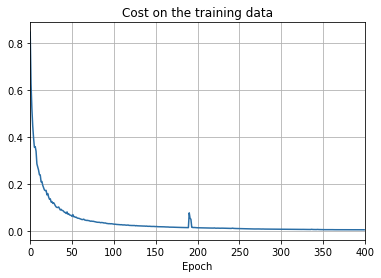

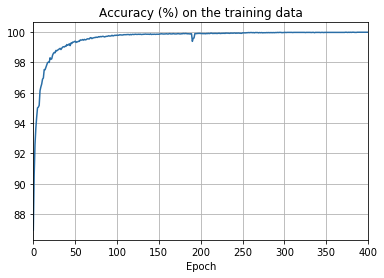

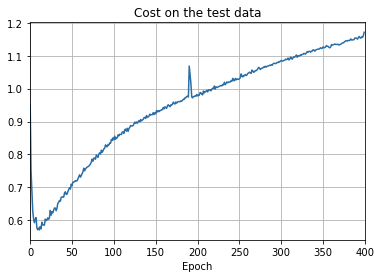

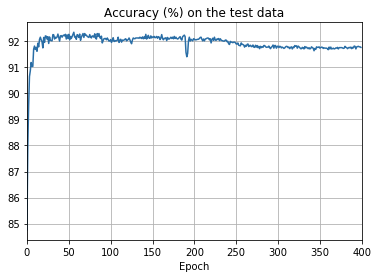

In [26]:
plot_helper.plot_training_cost(num_epochs=epochs, training_cost=training_cost, training_cost_xmin=0)
plot_helper.plot_training_accuracy(num_epochs=epochs, training_accuracy=training_accuracy, training_accuracy_xmin=0, training_set_size=10000)

plot_helper.plot_test_cost(num_epochs=epochs, test_cost=evaluation_cost, test_cost_xmin=0)
plot_helper.plot_test_accuracy(num_epochs=epochs, test_accuracy=evaluation_accuracy, test_accuracy_xmin=0)
